In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dota-data/DOTA/val/images/P2595.png
/kaggle/input/dota-data/DOTA/val/images/P0524.png
/kaggle/input/dota-data/DOTA/val/images/P1651.png
/kaggle/input/dota-data/DOTA/val/images/P2242.png
/kaggle/input/dota-data/DOTA/val/images/P2789.png
/kaggle/input/dota-data/DOTA/val/images/P1128.png
/kaggle/input/dota-data/DOTA/val/images/P1179.png
/kaggle/input/dota-data/DOTA/val/images/P1742.png
/kaggle/input/dota-data/DOTA/val/images/P2135.png
/kaggle/input/dota-data/DOTA/val/images/P2420.png
/kaggle/input/dota-data/DOTA/val/images/P1666.png
/kaggle/input/dota-data/DOTA/val/images/P2617.png
/kaggle/input/dota-data/DOTA/val/images/P2011.png
/kaggle/input/dota-data/DOTA/val/images/P2044.png
/kaggle/input/dota-data/DOTA/val/images/P2231.png
/kaggle/input/dota-data/DOTA/val/images/P0801.png
/kaggle/input/dota-data/DOTA/val/images/P1880.png
/kaggle/input/dota-data/DOTA/val/images/P0841.png
/kaggle/input/dota-data/DOTA/val/images/P2766.png
/kaggle/input/dota-data/DOTA/val/images/P2541.png


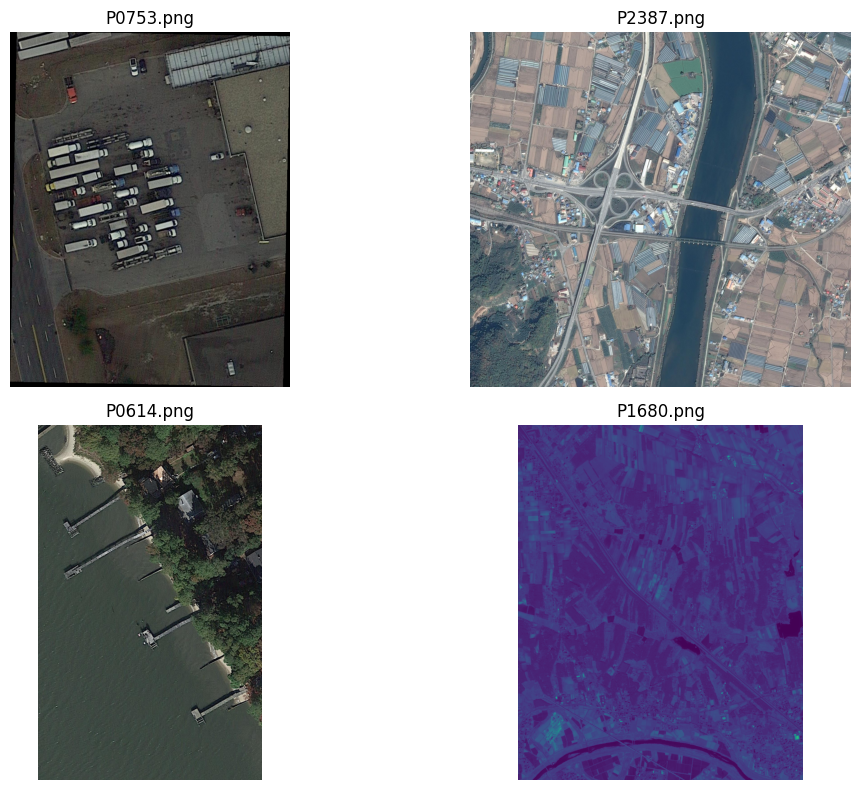

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

# Sample image paths
image_paths = [
    "/kaggle/input/dota-data/DOTA/train/images/P0753.png",
    "/kaggle/input/dota-data/DOTA/train/images/P2387.png",
    "/kaggle/input/dota-data/DOTA/train/images/P0614.png",
    "/kaggle/input/dota-data/DOTA/train/images/P1680.png"
]

# Plot them
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(img_path.split("/")[-1])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Fri Jul 11 17:20:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

In [6]:
# 1. Load image paths
img_dir = '/kaggle/input/dota-data/DOTA/train/images'
img_paths = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.png')]

In [7]:
# 2. Analyze image sizes and resolution
sizes = []
for path in img_paths[:100]:  # Limit to 100 for speed
    with Image.open(path) as img:
        sizes.append(img.size)  # (width, height)

widths, heights = zip(*sizes)
avg_width = sum(widths) // len(widths)
avg_height = sum(heights) // len(heights)

print(f" Average Image Size: {avg_width} x {avg_height}")
print(f"Min Size: {min(widths)} x {min(heights)}, Max Size: {max(widths)} x {max(heights)}")

 Average Image Size: 2276 x 2104
Min Size: 410 x 533, Max Size: 7530 x 7525


In [8]:
# 3. Check RGB vs Grayscale
sample_img = Image.open(img_paths[8])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: RGB


In [9]:
sample_img = Image.open(img_paths[0])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: L


In [10]:
sample_img = Image.open(img_paths[87])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: RGB


In [11]:
sample_img = Image.open(img_paths[1])
print(f"Sample image mode: {sample_img.mode}")

Sample image mode: L


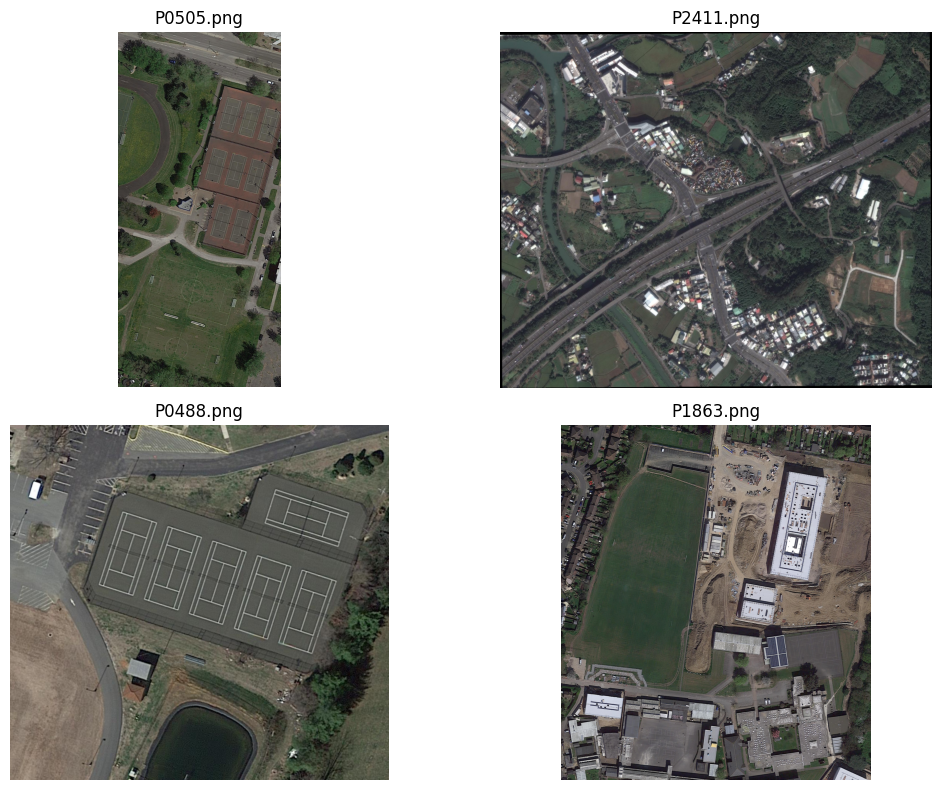

In [12]:
# 4. Display a few random images
plt.figure(figsize=(12, 8))
sample_paths = random.sample(img_paths, 4)

for i, path in enumerate(sample_paths):
    img = Image.open(path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis('off')

plt.tight_layout()
plt.show()